In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('Customer Purchasing Behaviors.csv')
grouped = df.drop(columns=['user_id']).groupby(df['region'].map(lambda x: 'North-East' if x in ['North', 'East'] else 'South-West'))

In [4]:
print(df.head())

   user_id  age  annual_income  purchase_amount  loyalty_score region  \
0        1   25          45000              200            4.5  North   
1        2   34          55000              350            7.0  South   
2        3   45          65000              500            8.0   West   
3        4   22          30000              150            3.0   East   
4        5   29          47000              220            4.8  North   

   purchase_frequency  
0                  12  
1                  18  
2                  22  
3                  10  
4                  13  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB
None


In [6]:
print(df.describe())

          user_id         age  annual_income  purchase_amount  loyalty_score  \
count  238.000000  238.000000     238.000000       238.000000     238.000000   
mean   119.500000   38.676471   57407.563025       425.630252       6.794118   
std     68.848868    9.351118   11403.875717       140.052062       1.899047   
min      1.000000   22.000000   30000.000000       150.000000       3.000000   
25%     60.250000   31.000000   50000.000000       320.000000       5.500000   
50%    119.500000   39.000000   59000.000000       440.000000       7.000000   
75%    178.750000   46.750000   66750.000000       527.500000       8.275000   
max    238.000000   55.000000   75000.000000       640.000000       9.500000   

       purchase_frequency  
count          238.000000  
mean            19.798319  
std              4.562884  
min             10.000000  
25%             17.000000  
50%             20.000000  
75%             23.000000  
max             28.000000  


In [8]:
# perform multi class classification using softmax regression
# import from sci-kit learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [10]:
# perform multi class classification using softmax regression
# train on the whole dataset and then predict on the same dataset
# plot the predicted values against the actual values

# analyses the overlap in the predicted values and the actual values

# start by splitting the data into features and target variables
X = df.drop(columns=['user_id', 'region'])
y = df['region']

# instantiate the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# fit the model
model.fit(X, y)

# predict the values
y_pred = model.predict(X)

# calculate the accuracy
accuracy = accuracy_score(y, y_pred)
print('Accuracy: ', accuracy)


Accuracy:  0.4327731092436975


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


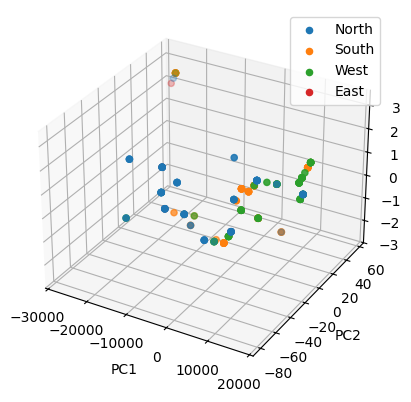

In [11]:
# plot the 4 regions in 3 dimensions using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for region in df['region'].unique():
    ax.scatter(X_pca[y == region, 0], X_pca[y == region, 1], X_pca[y == region, 2], label=region)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.legend()
plt.show()

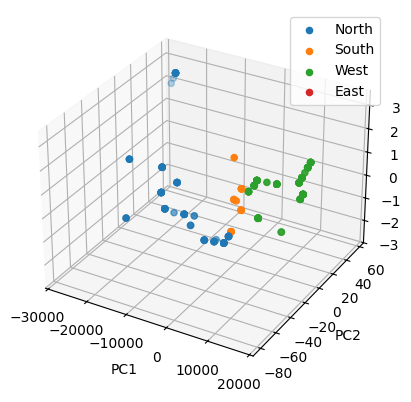

In [12]:
# plot 4 regions in 3 dimensions using PCA but of predicted values

X_pca = pca.fit_transform(X)
y_pred = model.predict(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for region in df['region'].unique():
    ax.scatter(X_pca[y_pred == region, 0], X_pca[y_pred == region, 1], X_pca[y_pred == region, 2], label=region)

ax.set_xlabel('PC1')

ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.legend()
plt.show()